In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [2]:
df_train = pd.read_csv('housePricesrain.csv')

In [3]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

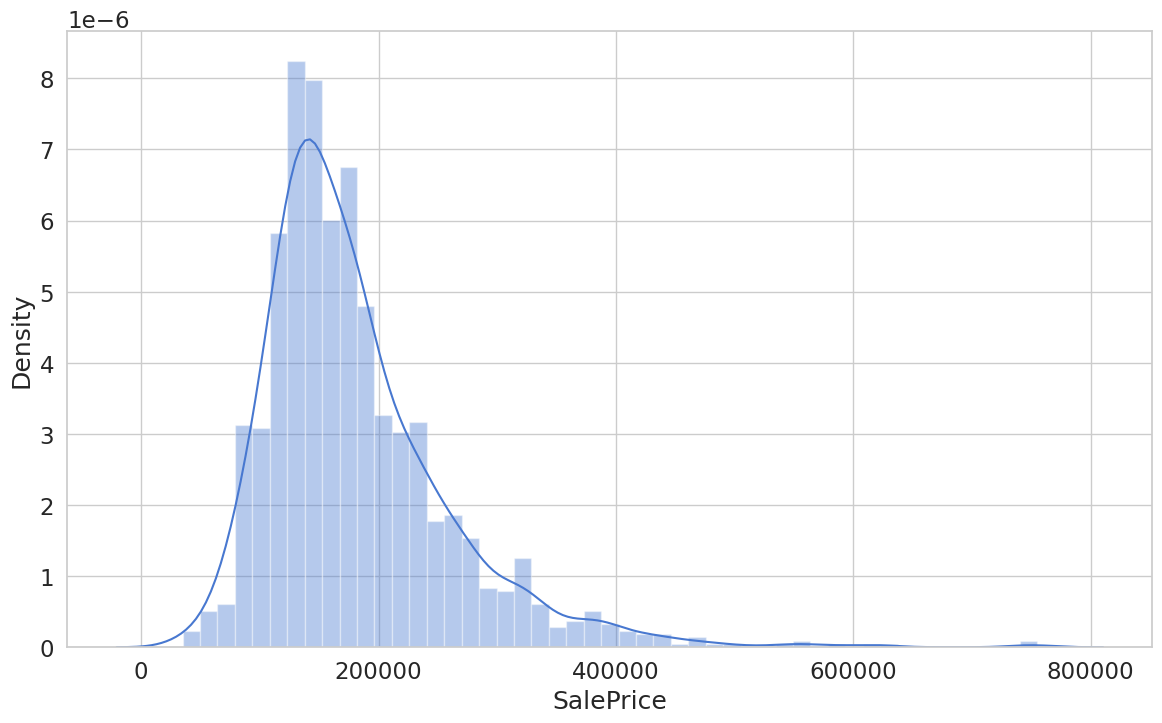

In [4]:
sns.distplot(df_train['SalePrice']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


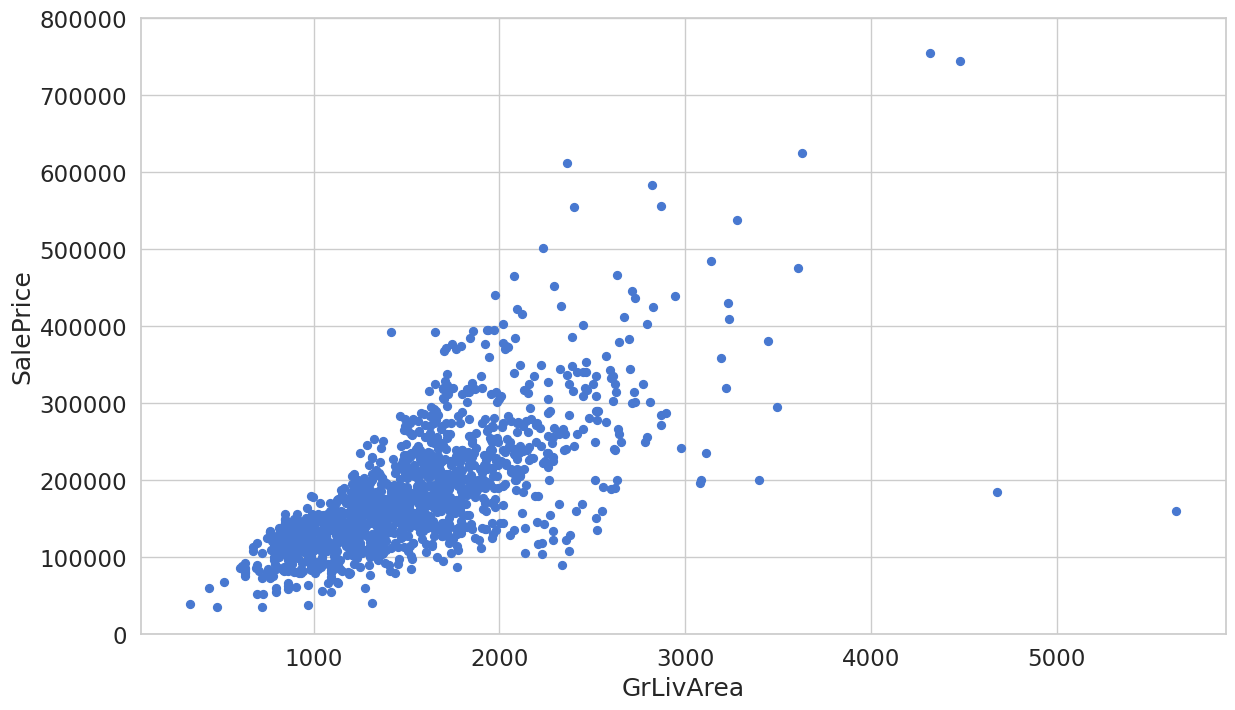

In [5]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


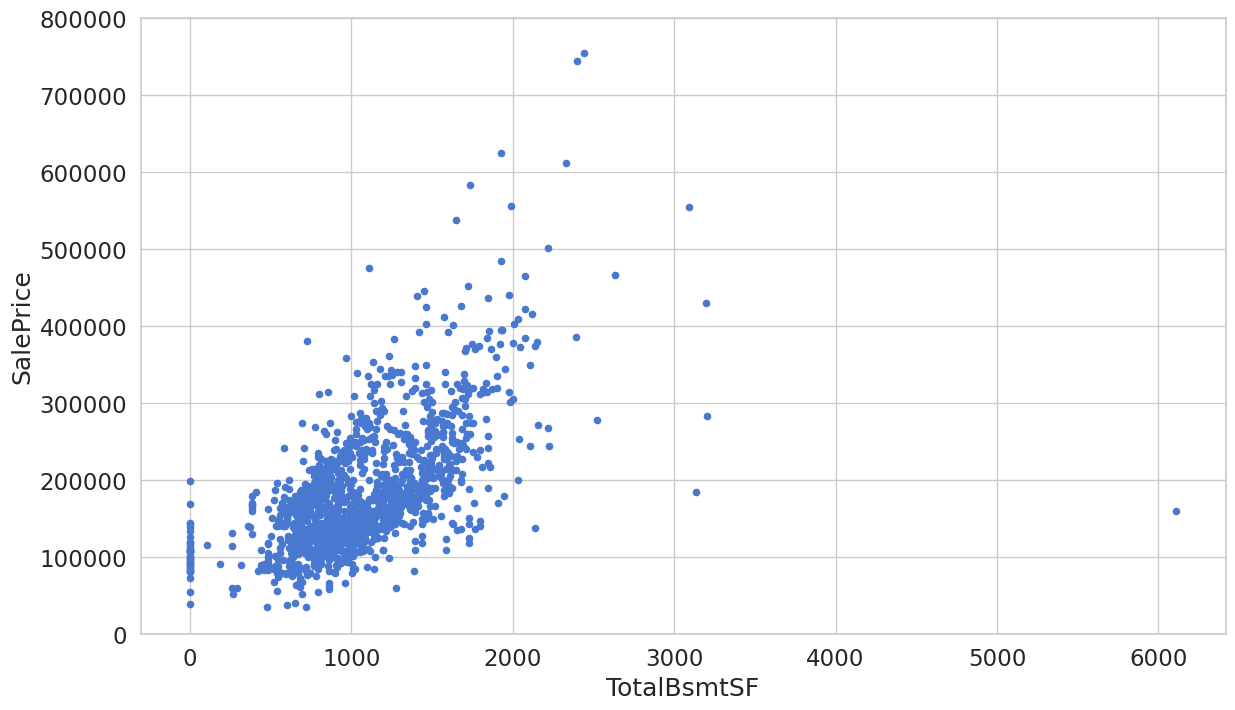

In [6]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

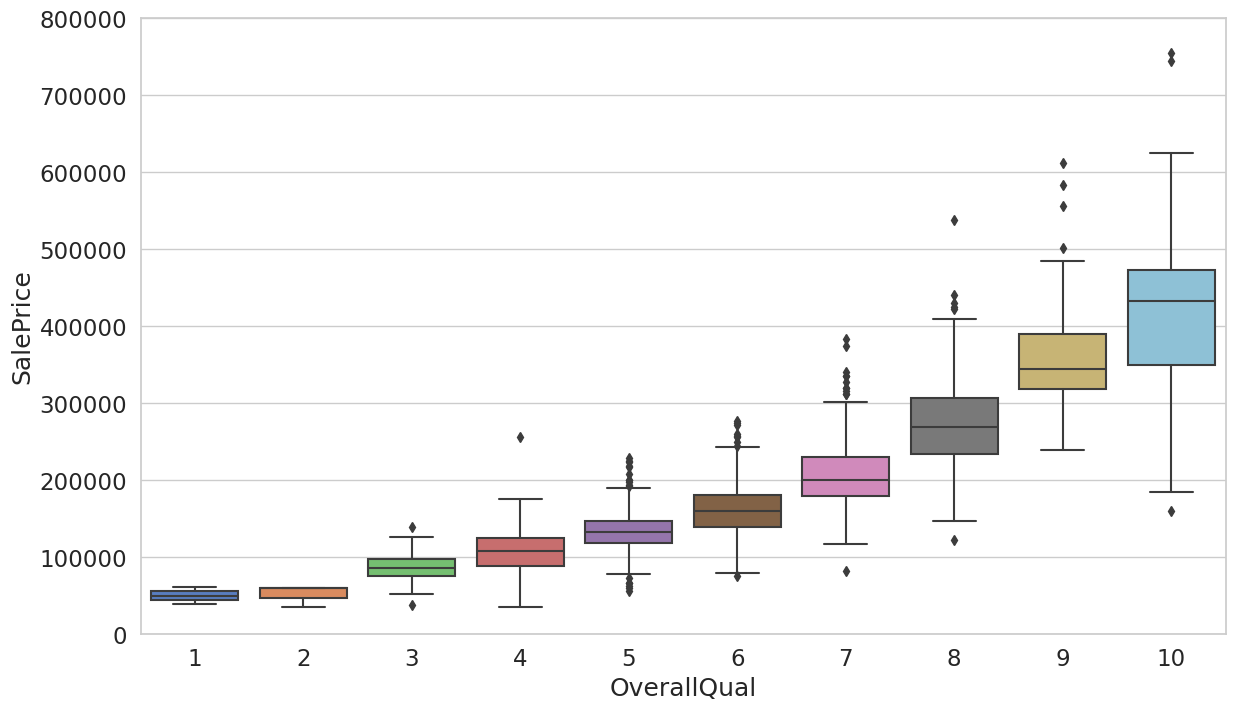

In [7]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

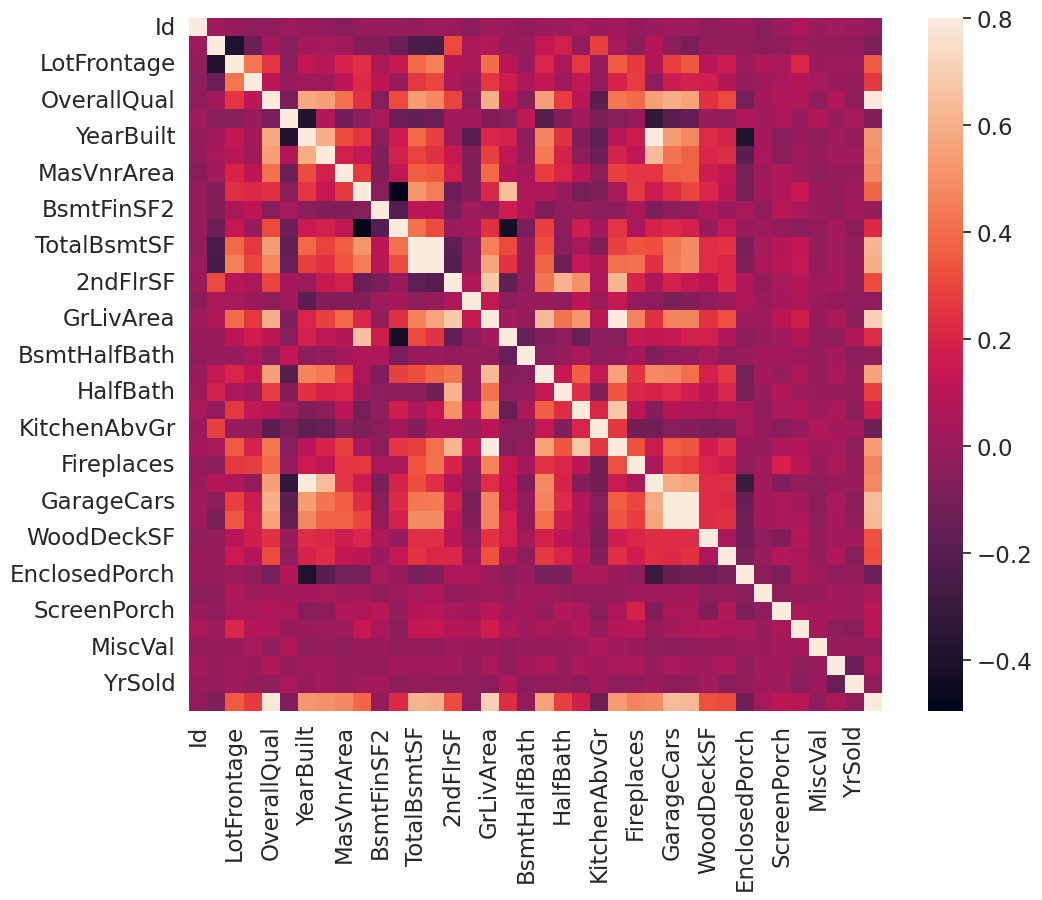

In [8]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

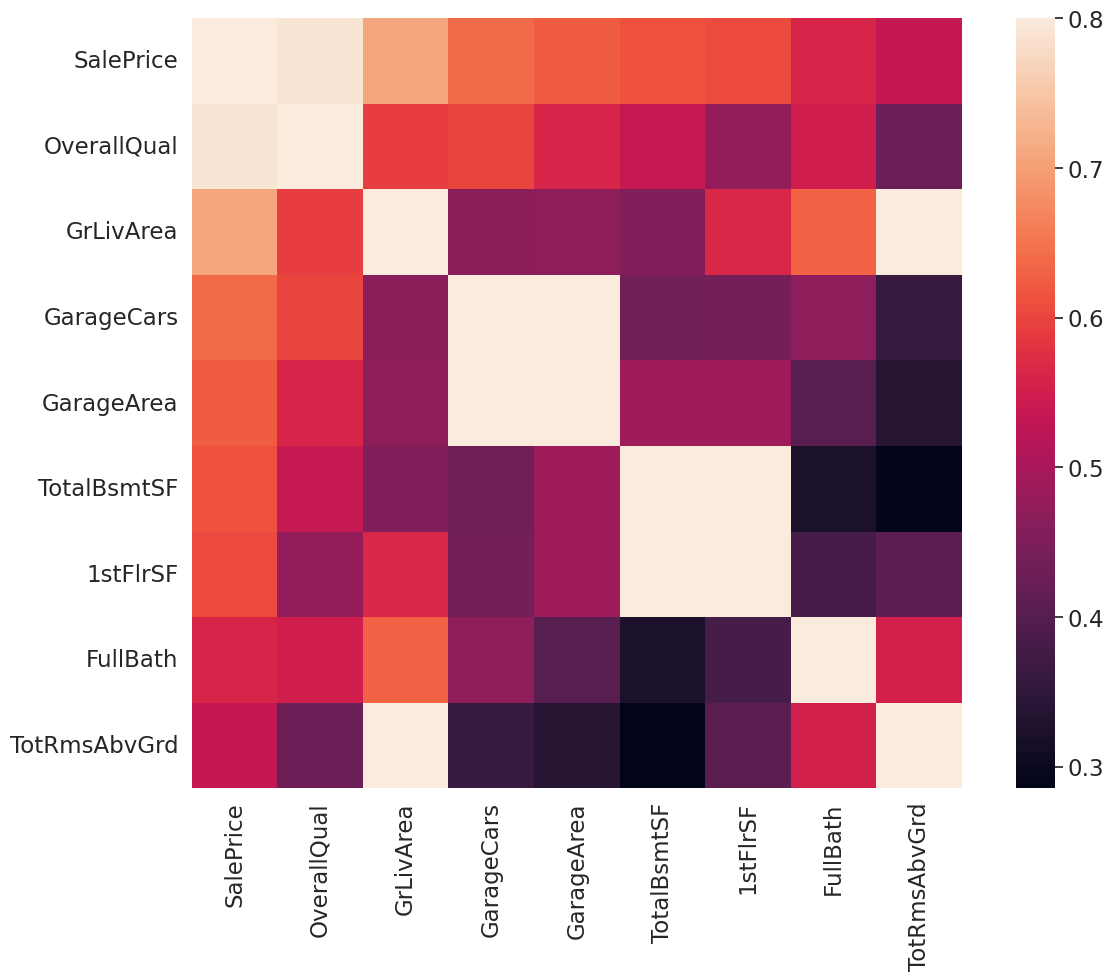

In [9]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

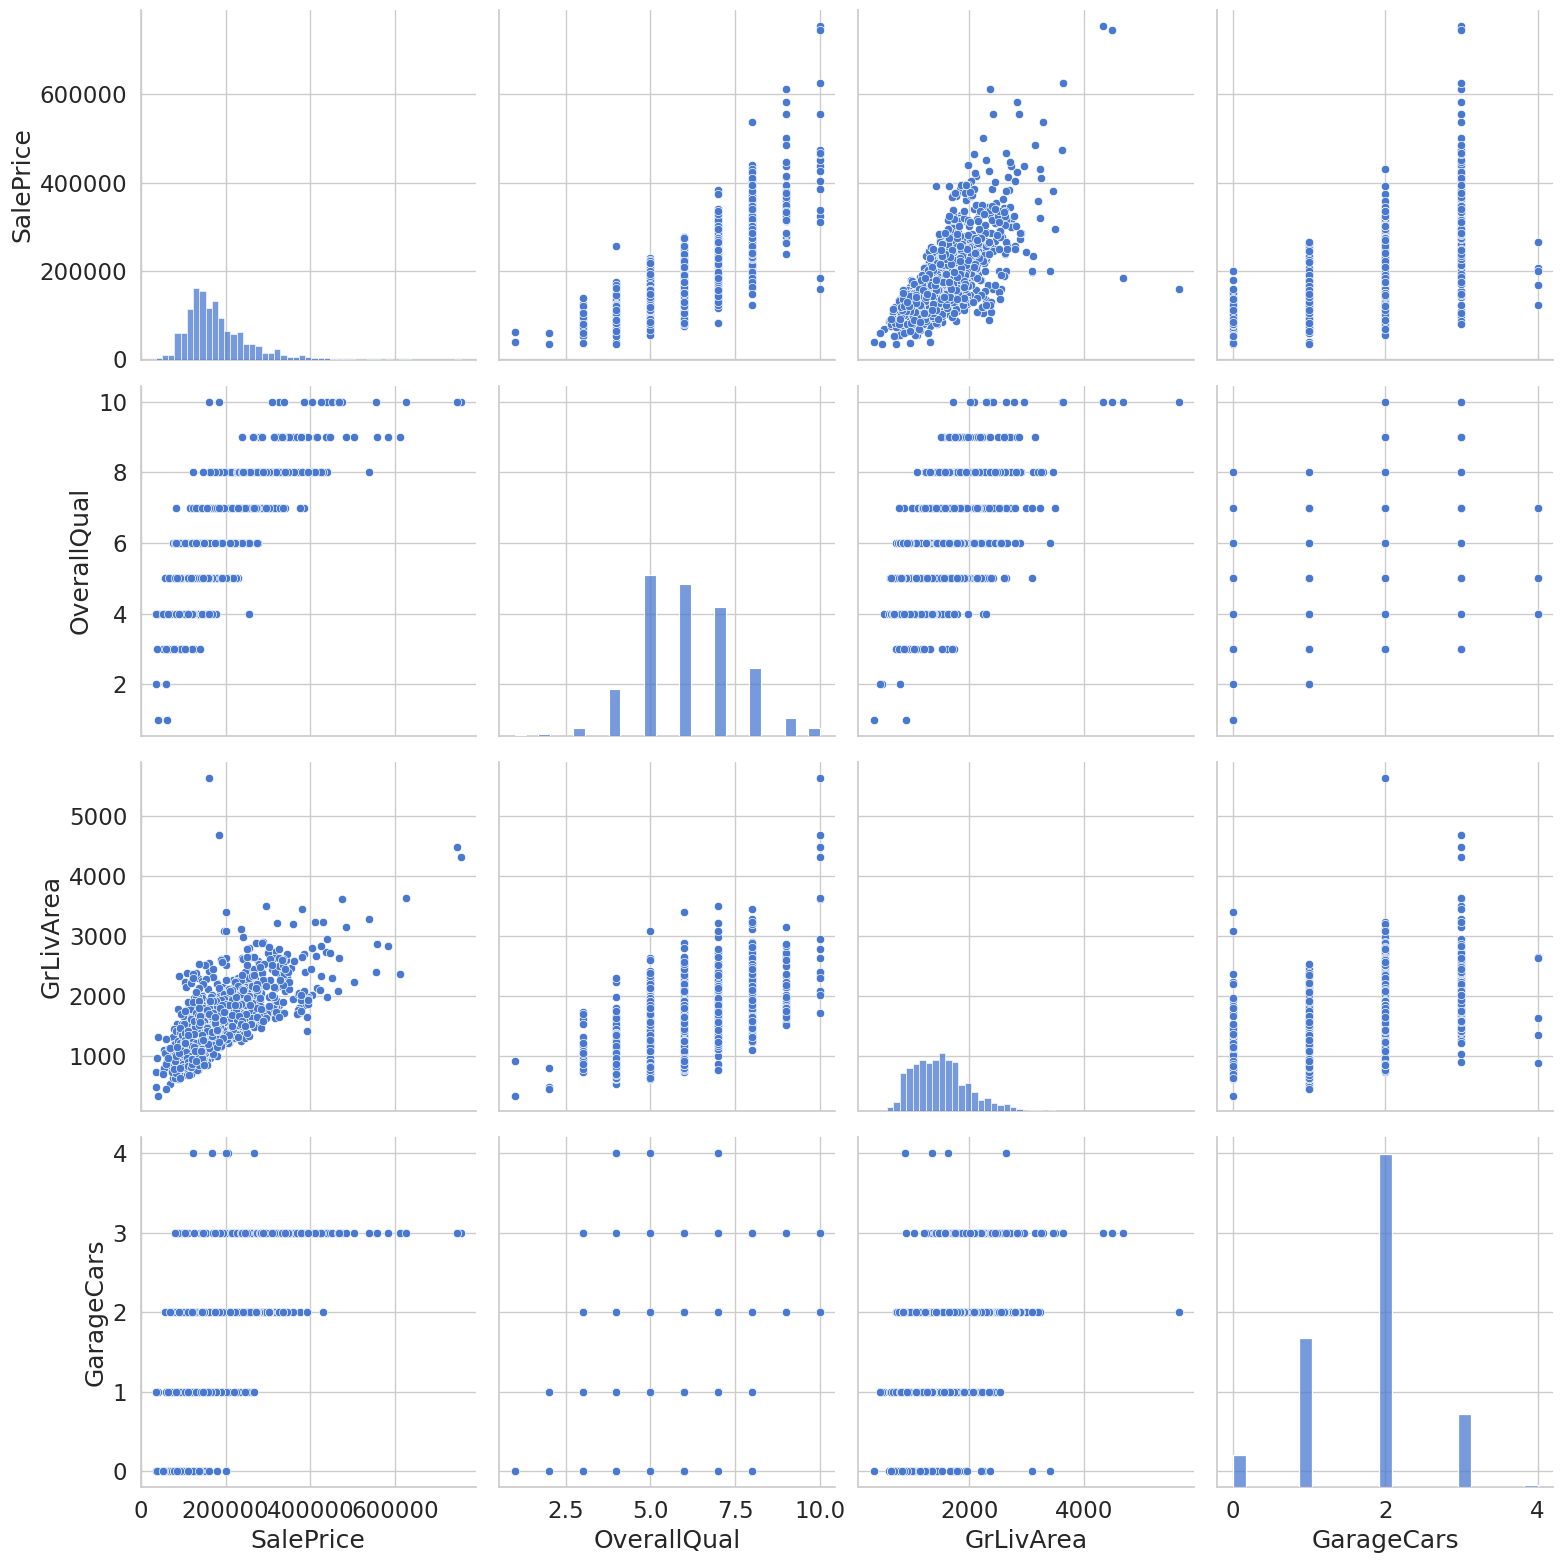

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [12]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [13]:
x.shape

(1460, 2)

In [14]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [15]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [16]:
run_tests()

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


In [17]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

In [18]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))

In [19]:
run_tests()

......
----------------------------------------------------------------------
Ran 6 tests in 0.841s

OK


In [20]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [21]:
clf._W

array([180921.19555322,  56294.90199925])

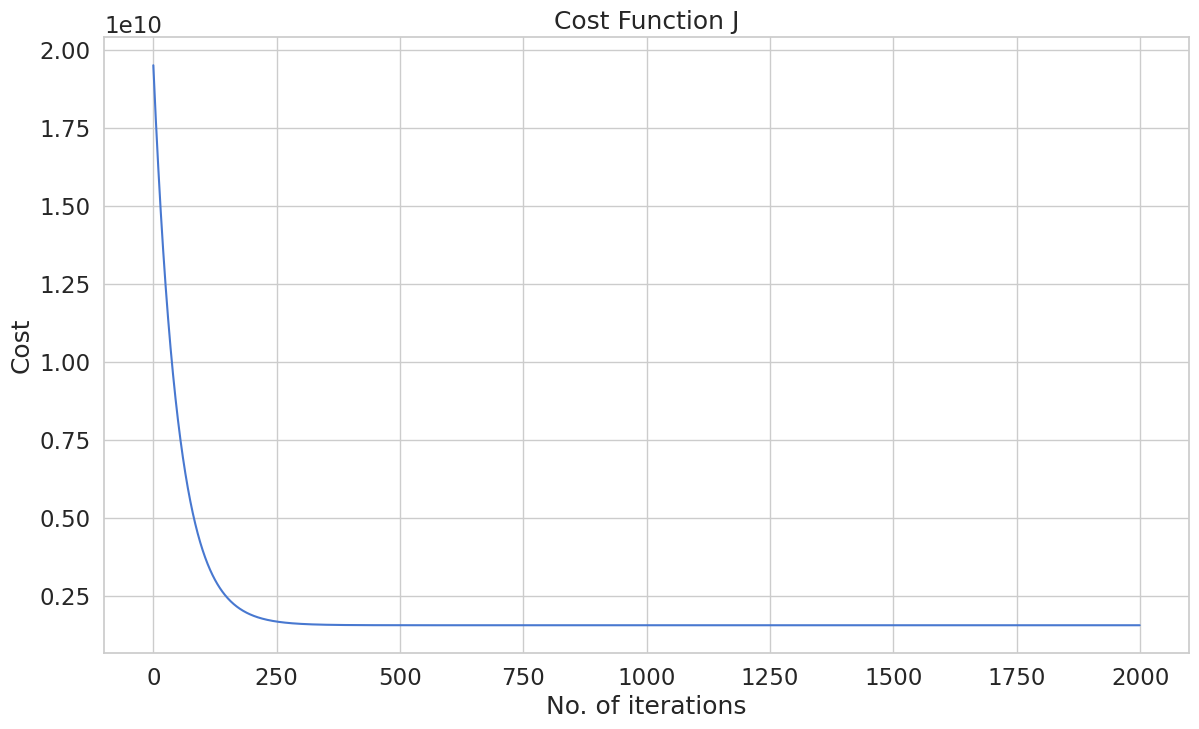

In [22]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [23]:
clf._cost_history[-1]

1569921604.8332634

In [30]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [31]:
clf._W


array([180921.19555322,  37478.604254  ,  26631.93830568,  15921.22581327])

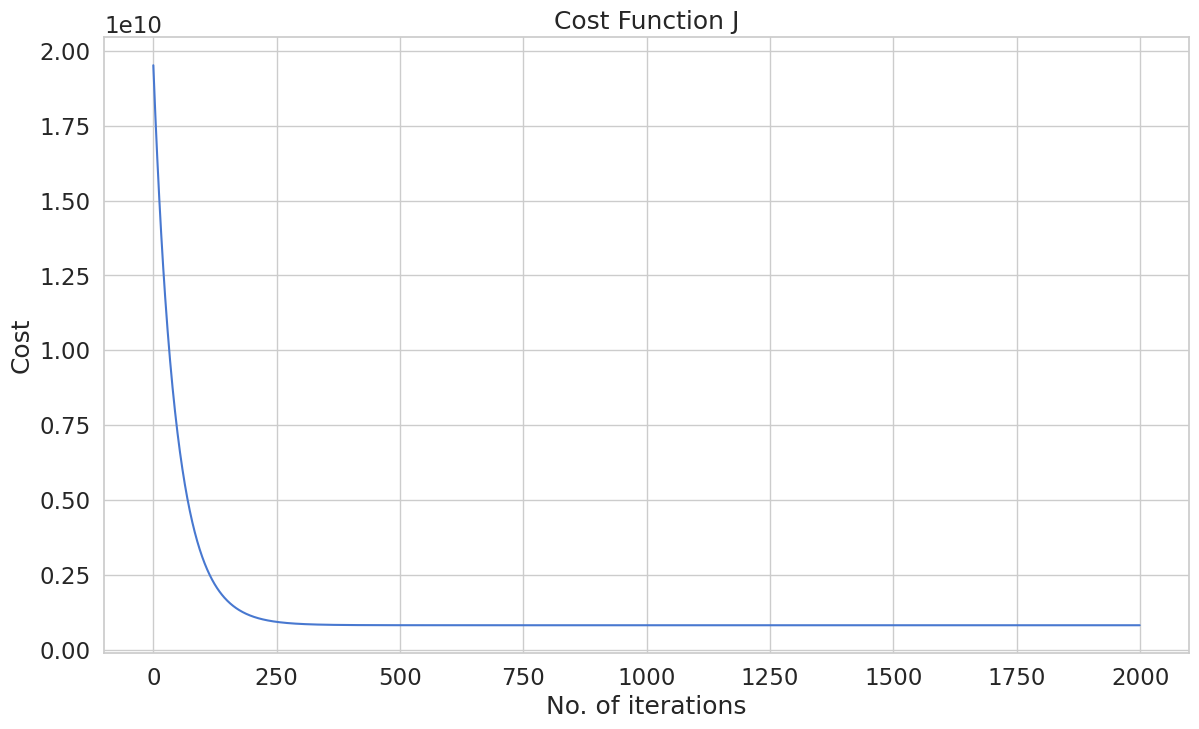

In [32]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [33]:
clf._cost_history[-1]

822817042.8437102